In [21]:
from scipy.stats import skew
import numpy as np

# Check skewness before transformation
kde_features = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                'CASH_ADVANCE', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'CREDIT_LIMIT']

skewed_before = df[kde_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("🔹 Skewness Before Transformation:\n")
print(skewed_before)

# Apply log1p transformation to only highly skewed features
# Define threshold (e.g., abs(skewness) > 1)
skew_threshold = 1
to_transform = skewed_before[abs(skewed_before) > skew_threshold].index

for col in to_transform:
    df[col] = np.log1p(df[col])  # Safe for 0s

# Check skewness again after transformation
skewed_after = df[to_transform].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\n🔹 Skewness After Transformation (Only Transformed Columns):\n")
print(skewed_after)


🔹 Skewness Before Transformation:

MINIMUM_PAYMENTS          11.365492
ONEOFF_PURCHASES           7.299131
PURCHASES                  6.086452
INSTALLMENTS_PURCHASES     5.929425
PAYMENTS                   5.470228
CASH_ADVANCE               4.336877
BALANCE                    2.196750
CREDIT_LIMIT               1.489923
dtype: float64

🔹 Skewness After Transformation (Only Transformed Columns):

CASH_ADVANCE              0.263046
ONEOFF_PURCHASES          0.184046
INSTALLMENTS_PURCHASES   -0.025150
CREDIT_LIMIT             -0.108054
PURCHASES                -0.768004
BALANCE                  -0.865644
MINIMUM_PAYMENTS         -1.197634
PAYMENTS                 -1.796902
dtype: float64


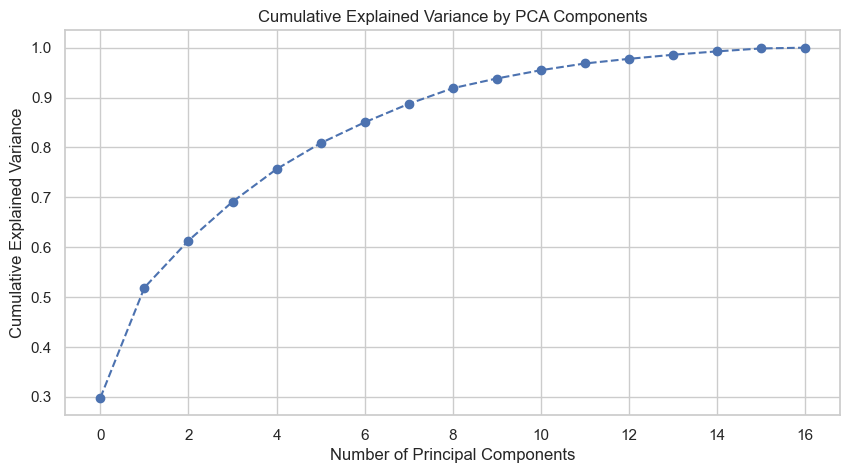

In [28]:
from sklearn.decomposition import PCA

# Initialize PCA (we'll keep all components initially)
pca = PCA()
pca_components = pca.fit_transform(scaled_df)

# Create a DataFrame for the PCA-transformed data
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(scaled_df.shape[1])])

# Scree plot: how much variance each PC explains
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


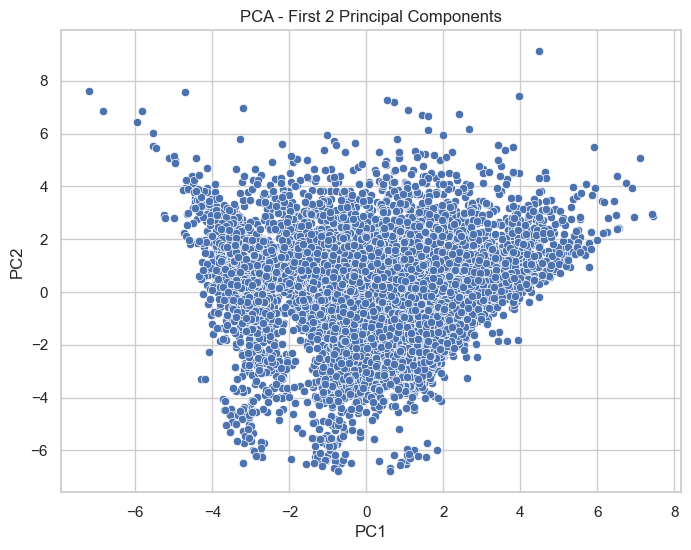

In [29]:
# Plot first 2 Principal Components
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'])
plt.title('PCA - First 2 Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


In [31]:
from IPython.display import display
import numpy as np
import pandas as pd

# Print how much each PC explains
explained = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative': np.cumsum(pca.explained_variance_ratio_)
})

# Ensure display is correctly used
display(explained.head(10))  # Show top 10 components


,Principal Component,Explained Variance Ratio,Cumulative
0,PC1,0.297886,0.297886
1,PC2,0.221008,0.518894
2,PC3,0.094150,0.613044
3,PC4,0.077871,0.690915
4,PC5,0.065480,0.756395
5,PC6,0.052114,0.808509
6,PC7,0.041680,0.850189
7,PC8,0.037018,0.887206
8,PC9,0.031481,0.918687
9,PC10,0.019468,0.938156


In [32]:
# Keep only the first 6 PCA components
pca_n_components = 6
pca_reduced_df = pca_df.iloc[:, :pca_n_components]  # Select first 6 PCs

# Display first few rows
print(pca_reduced_df.head())


        PC1       PC2       PC3       PC4       PC5       PC6
0 -0.664479 -2.393769 -0.410739 -0.923485 -0.365761 -0.321747
1 -2.884592  1.392166 -0.078434 -0.720014  1.485056  0.555446
2  1.416105  1.128116  2.714437 -0.797877 -0.775802  0.067377
3 -1.130576 -2.686020  2.604582  1.421446 -1.470373 -2.890059
4 -1.316022 -0.913659  0.653261 -1.721129 -0.620354  0.467107


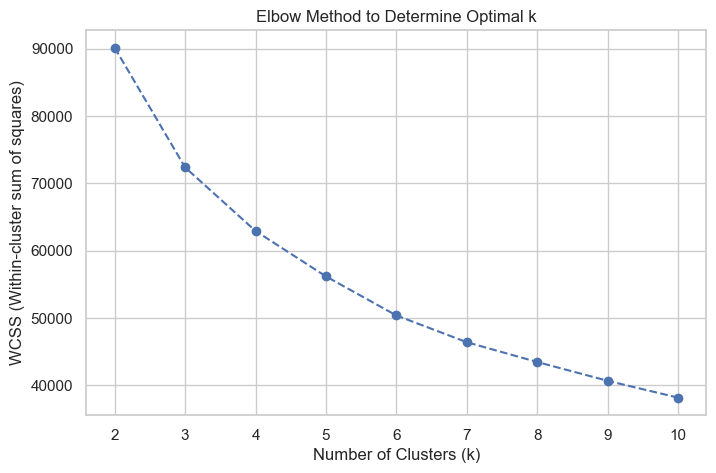

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Try different k values (2 to 10 clusters)
wcss = []  # Within-cluster sum of squares

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_reduced_df)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()
